In [42]:
import geopandas as gpd
import pandas as pd

In [43]:
arhangelskaya_oblast = gpd.read_file('data/arhangelskaya_oblast.geojson')
data = arhangelskaya_oblast
data

,region,id_full,level,type,name,id,geometry
0,Архангельская область,3,2,Область,Архангельская,144105,"MULTIPOLYGON (((6752340.851 16757142.533, 6747..."


In [44]:
print (data.crs.name)
data = data.to_crs('WGS84')
print(data.crs.name)
arhangelskaya_oblast = data
data.head(3)

WGS 84 / Pseudo-Mercator
WGS 84


,region,id_full,level,type,name,id,geometry
0,Архангельская область,3,2,Область,Архангельская,144105,"MULTIPOLYGON (((60.65731 81.73228, 60.61781 81..."


<AxesSubplot:>

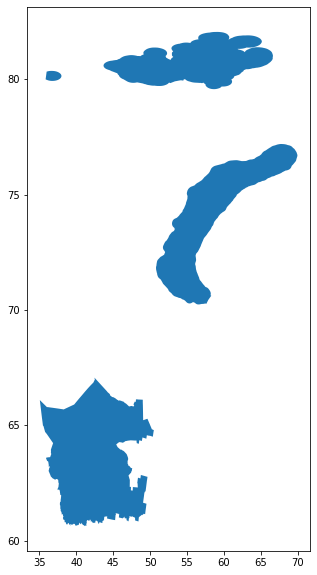

In [45]:
data.plot(figsize=(10,10))

In [53]:
all_res = []

def convert(objectid):
    obj = data[data.id == objectid]
    for _, row in obj.iterrows():
        seq = row.geometry.geoms
        polygons = []
        for polygon in seq:
            x, y = polygon.exterior.xy
            pairs = zip(x, y)
            coords = []
            for pair in pairs:
                coords.append([pair[1], pair[0]])
            polygons.append(coords)
        obj = {}
        obj['id'] = objectid
        obj['region'] = row.region
        obj['type'] = row.type
        obj['name'] = row.name
        obj['geometry'] = polygons

        all_res.append(obj)

data = arhangelskaya_oblast
objectids = data.id
for objectid in objectids:
    convert(objectid)

arhangelskaya_oblast_df = pd.DataFrame(all_res)
data = arhangelskaya_oblast_df
data

,id,region,type,name,geometry
0,144105,Архангельская область,Область,0,"[[[81.73228389994497, 60.657309900379154], [81..."


In [54]:
data.to_csv('data/arhangelskaya_oblast_lense.csv', index=False)